# **Labwork2 Using Pandas for data analytics**

## **Objective: Learn the main functions of Pandas for data analysis.**

## Task:
1. Download the `NationalNames.csv` file from Kaggle.com  
   [https://www.kaggle.com/datasets/kaggle/us-baby-names?select=NationalNames.csv](https://www.kaggle.com/datasets/kaggle/us-baby-names?select=NationalNames.csv)
2. Choose one variant for this laboratory work, using the formula:  
   **N = (n + 4 ) % 5 + 1**,  
   where n is the number in the group list.

In [1]:
n = 16
N = (16 + 4 ) % 5 + 1
f"Denys Kolesnychenko's variant: {N}"

"Denys Kolesnychenko's variant: 1"

## Variant 1
**Exercise numbers**: 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26.

## Completion of the tasks
### Preparing for the execution of the tasks
#### Importing data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'./data/NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### Task 1
#### Print the first 8 lines of the data set.

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### Task 2
#### Print the last 8 lines of the data set.

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### Task 3
#### Get the column names of the dataset.

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

### Task 5
#### Find the number of unique names in the data set.

In [6]:
df['Name'].nunique()

93889

### Task 10
#### Count the number of unique names in each year.

In [7]:
df.groupby('Year').agg({'Name' : 'nunique'})

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


### Task 11
#### Find the year with the most unique names.

In [8]:
df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name')

,Name
Year,
2008,32488


### Task 12
#### Find the most popular name in the year with the highest number of unique names (i.e. 2008).

In [9]:
most_unique_names_year = df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name').index[0]
df[df['Year'] == most_unique_names_year].groupby('Name').agg({'Count': 'sum'}).nlargest(1, 'Count').index[0]

'Jacob'

### Task 13
#### Find the year when the name Jacob was the most popular female's name in the country.

In [10]:
jacob_female_data = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_jacob_data = jacob_female_data[jacob_female_data['Count'] == jacob_female_data['Count'].max()]
most_popular_jacob_data

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


### Task 14
#### Find the year with the most gender-neutral names (same male and female names).

In [11]:
gender_counts_per_year_name = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names = gender_counts_per_year_name[gender_counts_per_year_name > 1]
year_counts = gender_neutral_names.groupby('Year').count()
max_count = year_counts.max()
result = year_counts[year_counts == year_counts.max()]

data_frame_result = pd.DataFrame({
    'Year': [year_counts.idxmax()], 
    'Gender_neutral_names': [max_count]
})

data_frame_result.set_index('Year')

,Gender_neutral_names
Year,
2008,2557


### Task 15
#### Find the total number of births in a year.

In [12]:
df.groupby(['Year']).agg({'Count':'sum'}).head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


### Task 16
#### Find the year when the most children were born.

In [13]:
total_births_per_year  = df.groupby(['Year']).agg({'Count':'sum'})
year_with_most_births = total_births_per_year[total_births_per_year['Count'] == total_births_per_year['Count'].max()]
year_with_most_births.index[0].item()

1957

### Task 17
#### Find the number of girls and boys born each year.

In [14]:
df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum').head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


### Task 18
#### Count the number of years when girls were born more than boys.

In [15]:
gender_counts_per_year = df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum')
years_with_more_girls = gender_counts_per_year[gender_counts_per_year['F'] > gender_counts_per_year['M']]
years_with_more_girls.shape[0]

54

### Task 21
#### Count how many times the boys were called Barbara.

In [16]:
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]
boys_named_barbara['Count'].sum().item()

4139

### Task 22
#### Calculate how many years of observation have been conducted.

In [17]:
f"Observation was conducted for {df['Year'].nunique()} years"

'Observation was conducted for 135 years'

### Task 23
#### Find the most popular gender-neutral names (those that are present every year).

In [18]:
gender_counts_per_year_name = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names = gender_counts_per_year_name[gender_counts_per_year_name > 1]
consistent_gender_neutral_names = gender_neutral_names.groupby('Name').size()
always_gender_neutral_names = consistent_gender_neutral_names[consistent_gender_neutral_names == df['Year'].nunique()]
name_counts = df[df['Name'].isin(always_gender_neutral_names.index)].groupby('Name')['Count'].sum()
sorted_name_counts = name_counts.sort_values(ascending=False)
pd.DataFrame(sorted_name_counts.reset_index()['Name'])

,Name
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


### Task 24
#### Find the most popular among the unpopular names (the unpopular name that was given to children the most times).

In [19]:
most_popular_unpopular_name = df[df['Count'] == 5].groupby('Name').agg({'Count' : 'sum'}).nlargest(1, 'Count')
name = most_popular_unpopular_name.index[0]
count = most_popular_unpopular_name['Count'].values[0]
f'The most popular of the unpopular names is {name}. This name has been called {count} times.'

'The most popular of the unpopular names is Celester. This name has been called 160 times.'

### Task 26
#### Draw graphs of the number of female names John and male names Mary by year.

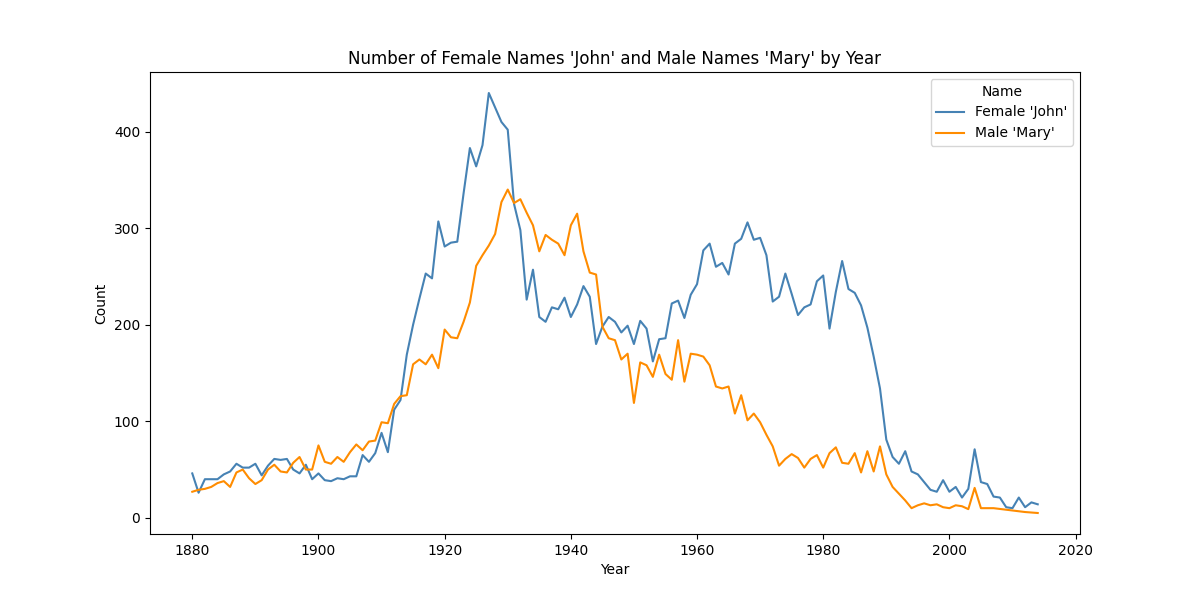

In [20]:
%matplotlib widget

female_john = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
male_mary = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

female_john_by_year = female_john.set_index('Year')['Count']
male_mary_by_year = male_mary.set_index('Year')['Count']

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(female_john_by_year.index, female_john_by_year.values, label="Female 'John'", color="steelblue")
plt.plot(male_mary_by_year.index, male_mary_by_year.values, label="Male 'Mary'", color="darkorange")

plt.title("Number of Female Names 'John' and Male Names 'Mary' by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Name')

plt.show()

In [21]:
# plt.close()